Jupyter Notebook per comparar els casos en que DeepXplore prediu correctament i DLFuzz no i viceversa. En aquest

In [ ]:
import os
import zipfile
import re

Mounted at /content/drive


In [ ]:
folder1 = "TFG/DeepXplore/GTSRB/Models_123/Resultats_DeepXplore_GTSRB"
folder2 = "TFG/DLFuzz/GTSRB/Resultats_DLFuzz_GTSRB"

def process_folder(folder):
    zip_files = [f for f in os.listdir(folder) if f.endswith('.zip')]
    txt_files = [f for f in os.listdir(folder) if f.endswith('.txt')]
    txt_paths = []

    for zip_file in zip_files:
        zip_path = os.path.join(folder, zip_file)
        extract_path = os.path.join('/content', zip_file.replace(".zip", ""))

        os.makedirs(extract_path, exist_ok=True)

        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
            print(f"Extracted {zip_file} to {extract_path}")

    for txt_file in txt_files:
        txt_path = os.path.join(folder, txt_file)
        print(f"Found TXT file: {txt_path}")
        txt_paths.append(txt_path)

    return txt_paths


txt_deepxplore = process_folder(folder1)
txt_dlfuzz = process_folder(folder2)


Extracted generated_inputs_trafficsigns_occl0.zip to /content/generated_inputs_trafficsigns_occl0
Extracted generated_inputs_trafficsigns_occl2.zip to /content/generated_inputs_trafficsigns_occl2
Extracted generated_inputs_trafficsigns_occl1.zip to /content/generated_inputs_trafficsigns_occl1
Extracted generated_inputs_trafficsigns_light0.zip to /content/generated_inputs_trafficsigns_light0
Extracted generated_inputs_trafficsigns_light1.zip to /content/generated_inputs_trafficsigns_light1
Extracted generated_inputs_trafficsigns_light2.zip to /content/generated_inputs_trafficsigns_light2
Extracted generated_inputs_trafficsigns_blackout0.zip to /content/generated_inputs_trafficsigns_blackout0
Extracted generated_inputs_trafficsigns_blackout2.zip to /content/generated_inputs_trafficsigns_blackout2
Extracted generated_inputs_trafficsigns_blackout1.zip to /content/generated_inputs_trafficsigns_blackout1
Found TXT file: /content/drive/MyDrive/GIA/TFG/Senyals_deepXplore/Material/Bons_Models/R

In [ ]:
import zipfile
with zipfile.ZipFile("/content/TFG/german_traffic_signs.zip", "r") as zip_ref:
    zip_ref.extractall("/content")

In [ ]:

def get_img_paths(data):
    imgs_paths = set()
    lines = data.strip().split("\n")
    for line in lines:
        if line.startswith("Image path:"):
            img_path = line.split(":")[1].strip()
            imgs_paths.add(img_path)
    return imgs_paths

unique_imgs_paths = set()

for txt_file in txt_deepxplore:
    with open(txt_file, "r") as f:
        info = f.read()
    unique_imgs_paths.update(get_img_paths(info))


unique_imgs_paths_list = list(unique_imgs_paths)

print(len(unique_imgs_paths_list))


303


In [ ]:
imgs_paths = []
def get_img_paths(data):
    lines = data.strip().split("\n")
    for i, line in enumerate(lines):
        if line.startswith("Image path:"):
            img_path = line.split(":")[1].strip()
            imgs_paths.append(img_path)
    print(imgs_paths)
    return imgs_paths

print(txt_deepxplore)
with open(txt_deepxplore[0], "r") as f:
    info = f.read()
deepxplore_paths = get_img_paths(info)

['/content/drive/MyDrive/GIA/TFG/Senyals_deepXplore/Material/Bons_Models/Resultats/output_trafficsigns_occl0.txt', '/content/drive/MyDrive/GIA/TFG/Senyals_deepXplore/Material/Bons_Models/Resultats/output_trafficsigns_light0.txt', '/content/drive/MyDrive/GIA/TFG/Senyals_deepXplore/Material/Bons_Models/Resultats/output_trafficsigns_blackout2.txt', '/content/drive/MyDrive/GIA/TFG/Senyals_deepXplore/Material/Bons_Models/Resultats/output_trafficsigns_blackout1.txt', '/content/drive/MyDrive/GIA/TFG/Senyals_deepXplore/Material/Bons_Models/Resultats/output_trafficsigns_blackout0.txt', '/content/drive/MyDrive/GIA/TFG/Senyals_deepXplore/Material/Bons_Models/Resultats/output_trafficsigns_light2.txt', '/content/drive/MyDrive/GIA/TFG/Senyals_deepXplore/Material/Bons_Models/Resultats/output_trafficsigns_light1.txt', '/content/drive/MyDrive/GIA/TFG/Senyals_deepXplore/Material/Bons_Models/Resultats/output_trafficsigns_occl2.txt', '/content/drive/MyDrive/GIA/TFG/Senyals_deepXplore/Material/Bons_Models/

In [6]:
with open(txt_dlfuzz[0], "r") as f:
    info = f.read()
dlfuzz_paths = get_img_paths(info)

['Test/02289.png', 'Test/06182.png', 'Test/03341.png', 'Test/08522.png', 'Test/02962.png', 'Test/02549.png', 'Test/02729.png', 'Test/02784.png', 'Test/06652.png', 'Test/01450.png', 'Test/08638.png', 'Test/08667.png', 'Test/01278.png', 'Test/04289.png', 'Test/01120.png', 'Test/08188.png', 'Test/07954.png', 'Test/06653.png', 'Test/11167.png', 'Test/05257.png', 'Test/01812.png', 'Test/01592.png', 'Test/07215.png', 'Test/08237.png', 'Test/05796.png', 'Test/05329.png', 'Test/05245.png', 'Test/02174.png', 'Test/03749.png', 'Test/09581.png', 'Test/11747.png', 'Test/08823.png', 'Test/07417.png', 'Test/11832.png', 'Test/06477.png', 'Test/11689.png', 'Test/03454.png', 'Test/08536.png', 'Test/10547.png', 'Test/06696.png', 'Test/11201.png', 'Test/11998.png', 'Test/04593.png', 'Test/11456.png', 'Test/05752.png', 'Test/02404.png', 'Test/09483.png', 'Test/03112.png', 'Test/01632.png', 'Test/05359.png', 'Test/01728.png', 'Test/00770.png', 'Test/07729.png', 'Test/11591.png', 'Test/07188.png', 'Test/125

In [7]:
print(len(dlfuzz_paths))
len(deepxplore_paths)

401


401



-----



In [8]:
gtsrb_labels = {
    0: "Speed limit_20 km-h",
    1: "Speed limit_30 km-h",
    2: "Speed limit_50 km-h",
    3: "Speed limit_60 km-h",
    4: "Speed limit_70 km-h",
    5: "Speed limit_80 km-h",
    6: "End of speed limit_80 km-h",
    7: "Speed limit_100 km-h",
    8: "Speed limit_120 km-h",
    9: "No passing",
    10: "No passing for vehicles over 3.5 metric tons",
    11: "Right-of-way at the next intersection",
    12: "Priority road",
    13: "Yield",
    14: "Stop",
    15: "No vehicles",
    16: "Vehicles over 3.5 metric tons prohibited",
    17: "No entry",
    18: "General caution",
    19: "Dangerous curve to the left",
    20: "Dangerous curve to the right",
    21: "Double curve",
    22: "Bumpy road",
    23: "Slippery road",
    24: "Road narrows on the right",
    25: "Road work",
    26: "Traffic signals",
    27: "Pedestrians",
    28: "Children crossing",
    29: "Bicycles crossing",
    30: "Beware of ice-snow",
    31: "Wild animals crossing",
    32: "End of all speed and passing limits",
    33: "Turn right ahead",
    34: "Turn left ahead",
    35: "Ahead only",
    36: "Go straight or right",
    37: "Go straight or left",
    38: "Keep right",
    39: "Keep left",
    40: "Roundabout mandatory",
    41: "End of no passing",
    42: "End of no passing for vehicles over 3.5 metric tons"
}

def decode_label(pred):
    return gtsrb_labels[pred]

In [ ]:
import pandas as pd

def load_original_predictions(csv_file):
    """Loads original predictions from a CSV file into a dictionary."""
    df = pd.read_csv(csv_file)
    original_preds = dict(zip(df.iloc[:, 7], df.iloc[:, 6]))
    return original_preds

def process_predictions_deep(txt_files, original_preds):
    """Processes text files to compare model predictions with original predictions."""
    correct_preds = {}
    incorrect_preds = {}

    for file in txt_files:
        with open(file, "r") as f:
            data = f.read()
        lines = data.strip().split("\n")

        img_path = None
        txt_name = os.path.splitext(os.path.basename(file))[0][len("output_"):]
        predictions_after = ""

        for i, line in enumerate(lines):
            if line.startswith("Image path:"):
                img_path = line.split(":")[1].strip()

            elif line.startswith("Models predictions after:"):
                predictions_after = line

            elif img_path and line.startswith("./generated_inputs"):
                original_filename = os.path.basename(line.strip())
                modified_path = f"./generated_inputs_{txt_name}/{original_filename}"

                if predictions_after:
                    pattern = re.compile(r"Model (\d+) -> ([^,]+) \(Conf: ([^\)]+)\), \(Original predicion conf: ([^\)]+)\)")
                    matches = pattern.findall(predictions_after)
                    incorrect_predictions = []
                    correct_predictions = []

                    for model_num, act_prediction, conf, original_conf in matches:
                        # print(act_prediction)
                        if img_path in original_preds:
                            original_class = decode_label(original_preds[img_path])
                            # print(original_class)
                            if act_prediction != original_class:
                                incorrect_predictions.append((modified_path, act_prediction))
                            else:
                                correct_predictions.append((modified_path, act_prediction))

                    if incorrect_predictions:
                        if img_path not in incorrect_preds:
                            incorrect_preds[img_path] = []
                        incorrect_preds[img_path].extend(incorrect_predictions)
                    if correct_predictions:
                        if img_path not in correct_preds:
                            correct_preds[img_path] = []
                        correct_preds[img_path].append(modified_path)

    return correct_preds, incorrect_preds

original_predictions = load_original_predictions("Test.csv")
correct_deep, incorrect_deep = process_predictions_deep(txt_deepxplore, original_predictions)

print("Correct Predictions:", correct_deep)
print("Incorrect Predictions:", incorrect_deep)


Correct Predictions: {'Test/02289.png': ['./generated_inputs_trafficsigns_occl0/occl_No entry_Yield_Yield_0.png', './generated_inputs_trafficsigns_light0/light_Keep right_Yield_Speed limit_20 km-h_0.png', './generated_inputs_trafficsigns_blackout2/blackout_Ahead only_Speed limit_30 km-h_Yield_0.png', './generated_inputs_trafficsigns_blackout0/blackout_Ahead only_Speed limit_30 km-h_Yield_0.png', './generated_inputs_trafficsigns_occl1/occl_Yield_Speed limit_30 km-h_Yield_0.png'], 'Test/06182.png': ['./generated_inputs_trafficsigns_occl0/occl_Yield_Speed limit_70 km-h_Speed limit_70 km-h_1.png', './generated_inputs_trafficsigns_occl2/occl_Speed limit_70 km-h_Speed limit_70 km-h_Road work_1.png', './generated_inputs_trafficsigns_occl1/occl_Speed limit_70 km-h_Yield_Speed limit_70 km-h_1.png'], 'Test/02962.png': ['./generated_inputs_trafficsigns_occl0/occl_Bumpy road_Yield_Yield_4.png', './generated_inputs_trafficsigns_occl1/occl_Bumpy road_Yield_Yield_4.png'], 'Test/02549.png': ['./genera

In [ ]:
import pandas as pd

def process_predictions(txt_files, original_preds):
    """Processes text files to compare model predictions with original predictions."""
    correct_preds = {}
    incorrect_preds = {}

    for file in txt_files:
        with open(file, "r") as f:
            data = f.read()
        lines = data.strip().split("\n")

        img_path = None
        txt_name = os.path.splitext(os.path.basename(file))[0][len("output_"):]
        predictions_after = []
        modified_images = []

        for i, line in enumerate(lines):
            if line.startswith("Image path:"):
                if img_path and predictions_after and modified_images:
                    process_image_predictions(img_path, predictions_after, modified_images, original_preds, correct_preds, incorrect_preds)
                img_path = line.split(":")[1].strip()
                predictions_after = []
                modified_images = []

            elif line.startswith("Models predictions after:"):
                match = re.search(r"Models predictions after: (.+) \((Conf: [0-9\.]+)\)", line)
                if match:
                    predictions_after.append(match.group(1))
                    # print(predictions_after)

            elif img_path and line.startswith("generated image: "):
                original_filename = os.path.basename(line.strip())
                modified_path = f"./generated_inputs_{txt_name}/{original_filename}"
                modified_images.append(modified_path)

        if img_path and predictions_after and modified_images:
            process_image_predictions(img_path, predictions_after, modified_images, original_preds, correct_preds, incorrect_preds)

    return correct_preds, incorrect_preds

def process_image_predictions(img_path, predictions_after, modified_images, original_preds, correct_preds, incorrect_preds):
    """Processes individual image predictions and categorizes them correctly or incorrectly."""
    for modified_path, prediction in zip(modified_images, predictions_after):
        # print(modified_path, prediction)
        if img_path in original_preds:
            original_class = decode_label(original_preds[img_path])
            if prediction == original_class:
                if img_path not in correct_preds:
                    correct_preds[img_path] = []
                correct_preds[img_path].append(modified_path)
            else:
                if img_path not in incorrect_preds:
                    incorrect_preds[img_path] = []
                incorrect_preds[img_path].append((modified_path, prediction))


correct_dlfuzz, incorrect_dlfuzz = process_predictions(txt_dlfuzz, original_predictions)

print("Correct Predictions:", correct_dlfuzz)
print("Incorrect Predictions:", incorrect_dlfuzz)

Correct Predictions: {'Test/01628.png': ['./generated_inputs_DLFuzz_Senyals_imgdeep_model1_0/01628_309726811119.png', './generated_inputs_DLFuzz_Senyals_imgdeep_model1_0/01628_309726811651.png', './generated_inputs_DLFuzz_Senyals_imgdeep_model1_0/01628_309726812176.png'], 'Test/04619.png': ['./generated_inputs_DLFuzz_Senyals_imgdeep_model1_0/04619_309728343960.png', './generated_inputs_DLFuzz_Senyals_imgdeep_model1_0/04619_309728347594.png', './generated_inputs_DLFuzz_Senyals_imgdeep_model1_0/04619_309728351714.png'], 'Test/09781.png': ['./generated_inputs_DLFuzz_Senyals_imgdeep_model1_0/09781_309730467207.png', './generated_inputs_DLFuzz_Senyals_imgdeep_model1_0/09781_309730473022.png'], 'Test/12008.png': ['./generated_inputs_DLFuzz_Senyals_imgdeep_model1_0/12008_309730776738.png', './generated_inputs_DLFuzz_Senyals_imgdeep_model1_0/12008_309730789819.png'], 'Test/07861.png': ['./generated_inputs_DLFuzz_Senyals_imgdeep_model1_0/07861_309732845223.png', './generated_inputs_DLFuzz_Senya

In [ ]:
import matplotlib.pyplot as plt
import cv2

def plot_images(image_paths, title, incorrect_labels=None):
    """Plots images given their file paths."""
    fig, axes = plt.subplots(1, len(image_paths), figsize=(15, 5))
    if len(image_paths) == 1:
        axes = [axes]

    for i, img_path in enumerate(image_paths):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img)
        axes[i].axis("off")
        label = incorrect_labels[i] if incorrect_labels else ""
        axes[i].set_title(label)

    plt.suptitle(title)
    plt.show()

def compare_dictionaries(correct_1, incorrect_1, correct_2, incorrect_2):
    """Compares images where one dictionary has correct predictions and the other doesn't."""
    original_preds = load_original_predictions("Test.csv")

    for img_path in set(correct_1.keys()).intersection(incorrect_2.keys()):
        print("\n")
        print(f"\nImage: {img_path}")
        plot_images(correct_1[img_path], f"Correct Predictions DeepXplore - {decode_label(original_preds[img_path])}")
        incorrect_imgs, incorrect_labels = zip(*incorrect_2[img_path])
        plot_images(incorrect_imgs, "Incorrect Predictions DLFuzz", incorrect_labels)

    print("-----------------------------------------------------------------------------------------------------------------------------------------------------------------------")

    for img_path in set(correct_2.keys()).intersection(incorrect_1.keys()):
        print(f"Image: {img_path}")
        plot_images(correct_2[img_path], f"Correct Predictions DLFuzz - {decode_label(original_preds[img_path])}")
        incorrect_imgs, incorrect_labels = zip(*incorrect_1[img_path])
        plot_images(incorrect_imgs, "Incorrect Predictions DeepXplore", incorrect_labels)

compare_dictionaries(correct_deep, incorrect_deep, correct_dlfuzz, incorrect_dlfuzz)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import matplotlib.pyplot as plt
import cv2

def plot_images(image_paths, title, incorrect_labels=None):
    """Plots images given their file paths."""
    fig, axes = plt.subplots(1, len(image_paths), figsize=(15, 5))
    if len(image_paths) == 1:
        axes = [axes]

    for i, img_path in enumerate(image_paths):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img)
        axes[i].axis("off")
        label = incorrect_labels[i] if incorrect_labels else ""
        axes[i].set_title(label)

    plt.suptitle(title)
    plt.show()



def compare_dictionaries(correct_1, incorrect_1, correct_2, incorrect_2):
    """Compares images where one dictionary has correct predictions and the other doesn't, showing images with their predictions."""
    original_preds = load_original_predictions("Test.csv")

    for img_path in set(correct_1.keys()).union(incorrect_1.keys(), correct_2.keys(), incorrect_2.keys()):
        print(f"Comparing for Image: {img_path}")

        if img_path in correct_1:
            plot_images(correct_1[img_path], f"Correct Predictions DeepXplore - {decode_label(original_preds[img_path])}")

        if img_path in incorrect_2:
            incorrect_imgs, incorrect_labels = zip(*incorrect_2[img_path])
            plot_images(incorrect_imgs, "Incorrect Predictions DLFuzz", incorrect_labels)

        print("++++++++++++++++++++++++++++++++++++++++++++++")

        if img_path in correct_2:
            plot_images(correct_2[img_path], f"Correct Predictions DLFuzz - {decode_label(original_preds[img_path])}")


        if img_path in incorrect_1:
            incorrect_imgs, incorrect_labels = zip(*incorrect_1[img_path])
            plot_images(incorrect_imgs, "Incorrect Predictions DeepXplore", incorrect_labels)

        print("-----------------------------------------------------------------------------------------------------------------------------------------------------------------------")



compare_dictionaries(correct_deep, incorrect_deep, correct_dlfuzz, incorrect_dlfuzz)



Output hidden; open in https://colab.research.google.com to view.



---



In [12]:
import cv2
import numpy as np
img_wb = []
def is_white_or_black(image_path):
    image = cv2.imread(image_path)
    image = image.astype(np.float32)

    return np.all(image == 255) or np.all(image == 0)

filtered_predictions = []
for key, values in incorrect_deep.items():
    for img_path, prediction in values:
        if "light" in img_path:
            if is_white_or_black(img_path):
                filtered_predictions.append((img_path, prediction))

for img_path, pred in filtered_predictions:
    print(f"Image: {img_path} -> Prediction: {pred}")
    img_wb.append(img_path)



Image: ./generated_inputs_trafficsigns_light0/light_Keep right_Yield_Speed limit_20 km-h_0.png -> Prediction: Keep right
Image: ./generated_inputs_trafficsigns_light0/light_Keep right_Yield_Speed limit_20 km-h_0.png -> Prediction: Speed limit_20 km-h
Image: ./generated_inputs_trafficsigns_light2/light_Go straight or right_No entry_Bicycles crossing_0.png -> Prediction: Go straight or right
Image: ./generated_inputs_trafficsigns_light2/light_Go straight or right_No entry_Bicycles crossing_0.png -> Prediction: No entry
Image: ./generated_inputs_trafficsigns_light2/light_Go straight or right_No entry_Bicycles crossing_0.png -> Prediction: Bicycles crossing
Image: ./generated_inputs_trafficsigns_light1/light_Go straight or right_No entry_Bicycles crossing_0.png -> Prediction: Go straight or right
Image: ./generated_inputs_trafficsigns_light1/light_Go straight or right_No entry_Bicycles crossing_0.png -> Prediction: No entry
Image: ./generated_inputs_trafficsigns_light1/light_Go straight or

In [13]:
img_wb

['./generated_inputs_trafficsigns_light0/light_Keep right_Yield_Speed limit_20 km-h_0.png',
 './generated_inputs_trafficsigns_light0/light_Keep right_Yield_Speed limit_20 km-h_0.png',
 './generated_inputs_trafficsigns_light2/light_Go straight or right_No entry_Bicycles crossing_0.png',
 './generated_inputs_trafficsigns_light2/light_Go straight or right_No entry_Bicycles crossing_0.png',
 './generated_inputs_trafficsigns_light2/light_Go straight or right_No entry_Bicycles crossing_0.png',
 './generated_inputs_trafficsigns_light1/light_Go straight or right_No entry_Bicycles crossing_0.png',
 './generated_inputs_trafficsigns_light1/light_Go straight or right_No entry_Bicycles crossing_0.png',
 './generated_inputs_trafficsigns_light1/light_Go straight or right_No entry_Bicycles crossing_0.png',
 './generated_inputs_trafficsigns_light0/light_Go straight or right_No entry_Bicycles crossing_1.png',
 './generated_inputs_trafficsigns_light0/light_Go straight or right_No entry_Bicycles crossing_

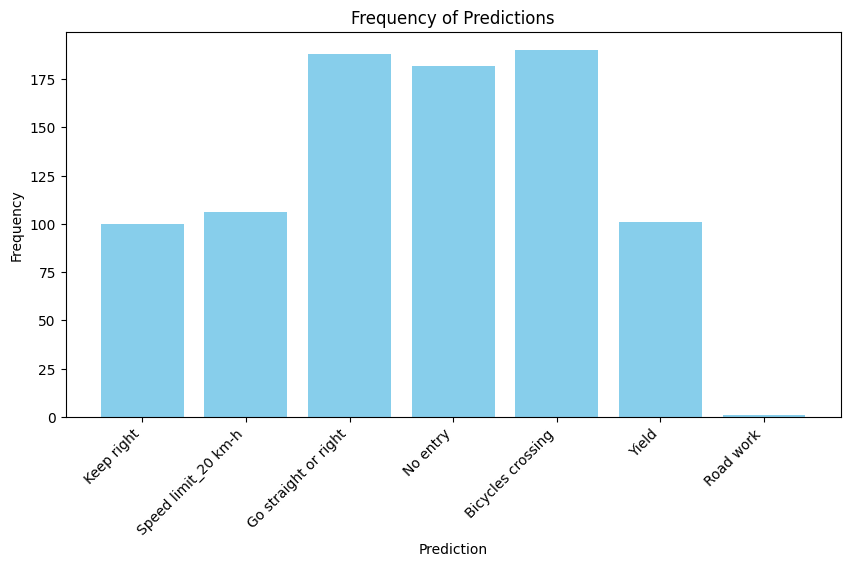

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


def is_white_or_black(image_path):
    image = cv2.imread(image_path)
    image = image.astype(np.float32)

    if np.all(image == 255) or np.all(image == 0):
        return True, image
    return False, None

filtered_predictions = []

for key, values in incorrect_deep.items():
    for img_path, prediction in values:
        if "light" in img_path:
            is_valid, _ = is_white_or_black(img_path)
            if is_valid:
                filtered_predictions.append(prediction)

prediction_counts = Counter(filtered_predictions)

plt.figure(figsize=(10, 5))
plt.bar(prediction_counts.keys(), prediction_counts.values(), color='skyblue')
plt.xlabel('Prediction')
plt.ylabel('Frequency')
plt.title('Frequency of Predictions')
plt.xticks(rotation=45, ha='right')
plt.show()


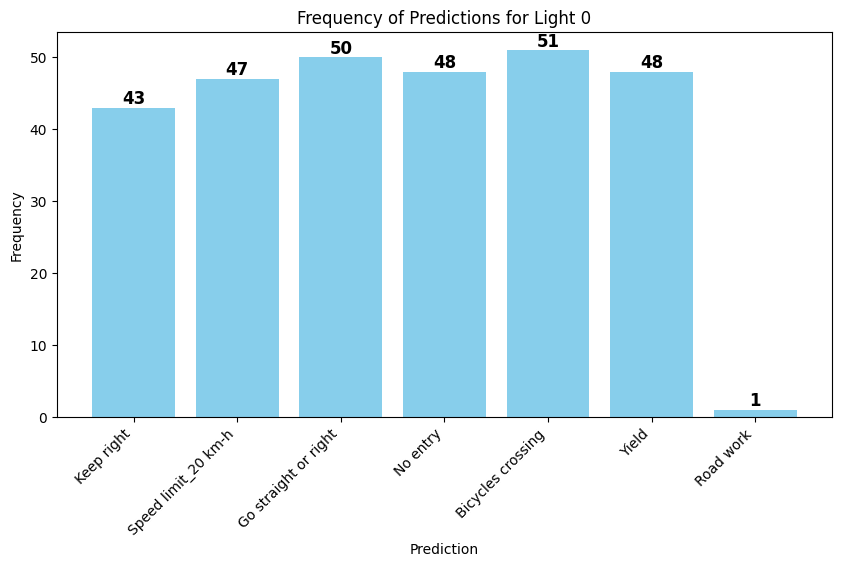

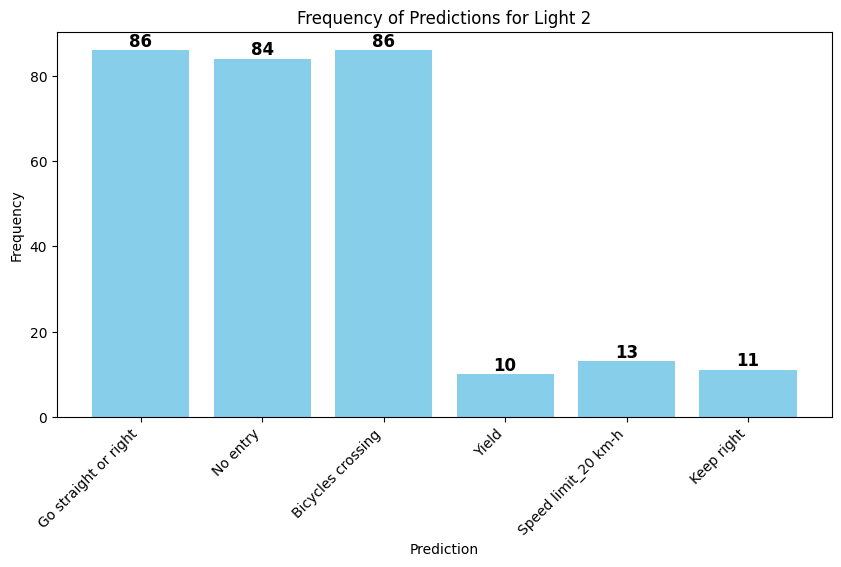

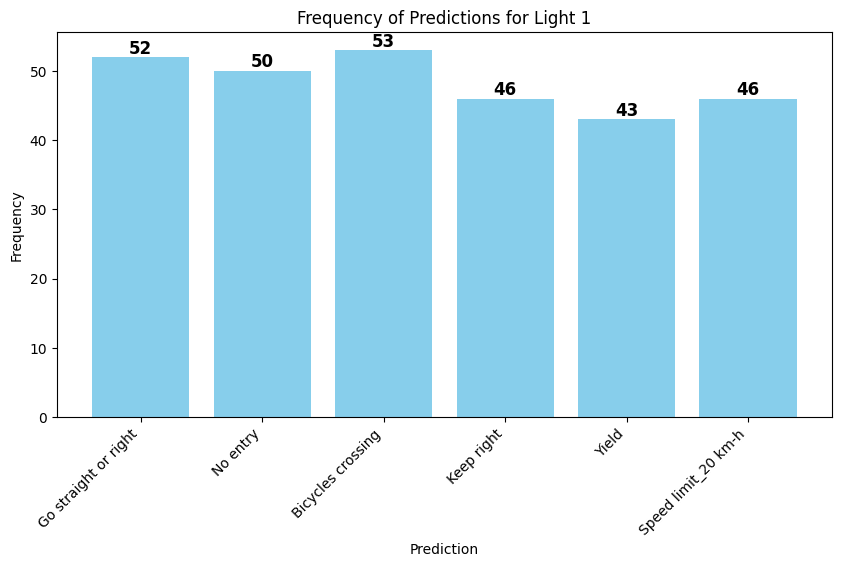

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import defaultdict, Counter

def is_white_or_black(image_path):
    image = cv2.imread(image_path)

    image = image.astype(np.float32)

    if np.all(image == 255) or np.all(image == 0):
        return True, image
    return False, None

light_categories = defaultdict(list)

for key, values in incorrect_deep.items():
    for img_path, prediction in values:
        if "light" in img_path:
            match = re.search(r'light(\d+)', img_path)
            if match:
                light_number = int(match.group(1))
                is_valid, _ = is_white_or_black(img_path)
                if is_valid:
                    light_categories[light_number].append(prediction)

for light_number, predictions in light_categories.items():
    prediction_counts = Counter(predictions)

    plt.figure(figsize=(10, 5))
    bars = plt.bar(prediction_counts.keys(), prediction_counts.values(), color='skyblue')
    plt.bar(prediction_counts.keys(), prediction_counts.values(), color='skyblue')
    plt.xlabel('Prediction')
    plt.ylabel('Frequency')
    plt.title(f'Frequency of Predictions for Light {light_number}')
    plt.xticks(rotation=45, ha='right')
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom', fontsize=12, fontweight='bold')

    plt.show()


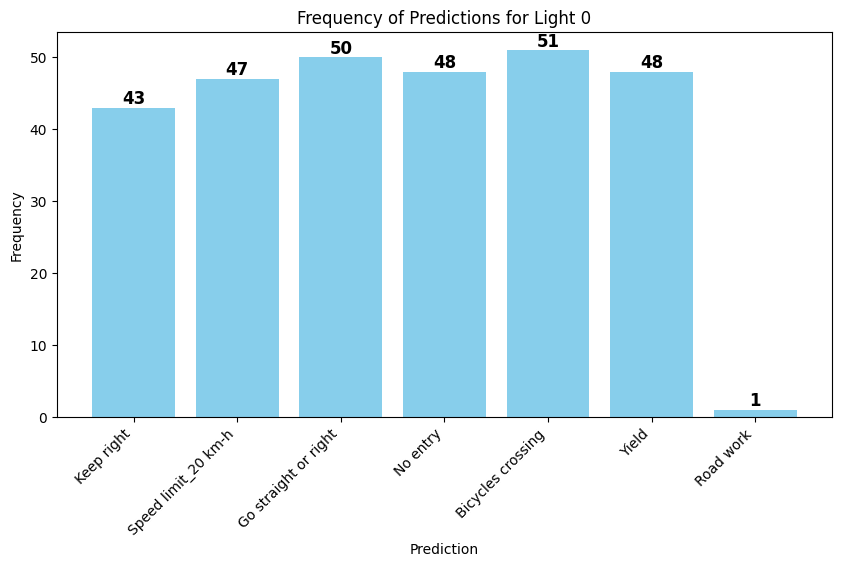

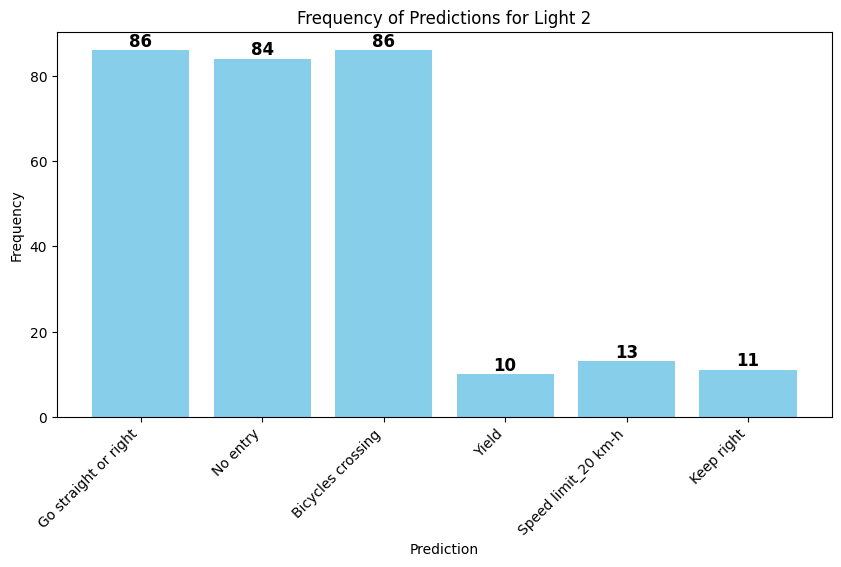

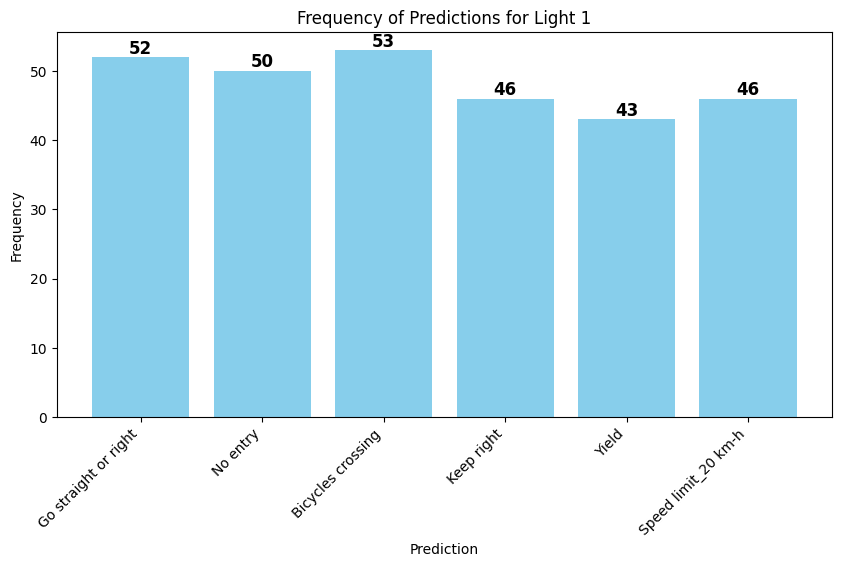

In [ ]:
def is_mostly_white_or_black(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image: {image_path}")
        return False, None

    image = image.astype(np.float32)

    if np.all((image >= 245) & (image <= 255)) or np.all((image >= 0) & (image <= 10)):
        return True, image
    return False, None

light_categories = defaultdict(list)

for key, values in incorrect_deep.items():
    for img_path, prediction in values:
        if "light" in img_path:
            match = re.search(r'light(\d+)', img_path)
            if match:
                light_number = int(match.group(1))
                is_valid, _ = is_mostly_white_or_black(img_path)
                if is_valid:
                    light_categories[light_number].append(prediction)

for light_number, predictions in light_categories.items():
    prediction_counts = Counter(predictions)

    plt.figure(figsize=(10, 5))
    bars = plt.bar(prediction_counts.keys(), prediction_counts.values(), color='skyblue')
    plt.bar(prediction_counts.keys(), prediction_counts.values(), color='skyblue')
    plt.xlabel('Prediction')
    plt.ylabel('Frequency')
    plt.title(f'Frequency of Predictions for Light {light_number}')
    plt.xticks(rotation=45, ha='right')
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom', fontsize=12, fontweight='bold')

    plt.show()
